In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def counting(df2):
    grp = df2.groupby('product_productid')
    movies = grp.review_userid.nunique().sort_values(ascending=False)
    grp = df2.groupby('review_userid')
    test1 = grp.product_productid.nunique()
    users = test1.sort_values(ascending=False)
    return movies,users


def filter_fun(df2, user_filt, movie_filt):
    grp = df2.groupby('product_productid')
    movies = grp.review_userid.nunique().sort_values(ascending=False)
    grp = df2.groupby('review_userid')
    test1 = grp.product_productid.nunique()
    #Users
    users = test1.sort_values(ascending=False)
    top_users = users[users>user_filt].keys()
    top_movies = movies[movies>movie_filt].keys()

    top_mov_us = df2[df2['review_userid'].isin(top_users)]
    top_mov_us = top_mov_us[top_mov_us['product_productid'].isin(top_movies)]
    users_unique = np.unique(top_mov_us.ix[:,'review_userid'])
    movies_unique = np.unique(top_mov_us.ix[:,'product_productid'])

    return top_mov_us, movies_unique,users_unique


In [4]:
#df = pd.read_csv("user_movie.csv")
df = pd.read_csv("reviews_score.csv")
#df = df.ix[:,1:]

In [93]:
df.head()

,Unnamed: 0,product_productid,review_userid,score
0,1,B003AI2VGA,A141HP4LYPWMSR,3.000000
1,2,B003AI2VGA,A328S9RN3U5M68,3.000000
2,3,B003AI2VGA,A1I7QGUDP043DG,4.557926
3,4,B003AI2VGA,A1M5405JH9THP9,3.000000
4,5,B003AI2VGA,ATXL536YX71TR,3.000000


In [6]:
osc_movies = pd.read_csv("oscar_nominations.csv")
top_mov_us, movies_unique,users_unique = filter_fun(df,500,500)


In [7]:
movies,users = counting(df)
print len(movies)
print len(users)



253059
889172


In [8]:
oscars = df[df['product_productid'].isin(osc_movies.ASIN)]
oscars2 = oscars[oscars['review_userid'].isin(users[0:100].index)]
print len(np.unique(oscars.product_productid))
print len(np.unique(oscars.review_userid))

print len(np.unique(oscars2.product_productid))
print len(np.unique(oscars2.review_userid))


82
17902
73
92


In [9]:
top_users = oscars[oscars['review_userid'].isin(users[0:100].index)]
print len(np.unique(top_users.review_userid))

top_movies = oscars[oscars['product_productid'].isin(movies[0:500].index)]
print len(np.unique(top_movies.product_productid))




92
7


In [10]:
top_users_total = df[df['review_userid'].isin(users[0:100].index)]
top_movies_total = top_users_total[top_users_total['product_productid'].isin(movies[0:500].index)]

print len(np.unique(top_movies_total.review_userid))
print len(np.unique(top_movies_total.product_productid))

top_movies_total_osc = top_movies_total[top_movies_total['product_productid'].isin(osc_movies.ASIN)]

print len(np.unique(top_movies_total_osc.review_userid))
print len(np.unique(top_movies_total_osc.product_productid))


top_movies_total_osc.head()


97
495
68
7


,Unnamed: 0,product_productid,review_userid,score
931400,931401,B00867GKIK,ANCOMAI0I7LVG,4.828059
931402,931403,B00867GKIK,A39CX0EE4BZCZC,4.828003
931404,931405,B00867GKIK,A34D06JL7LC6MU,4.827621
931408,931409,B00867GKIK,A1D2C0WDCSHUWZ,4.804123
931428,931429,B00867GKIK,A2ATWKOFJXRRR1,4.771912


In [54]:
top_movies_total

,Unnamed: 0,product_productid,review_userid,score
15768,15769,B002VL2PTU,A328S9RN3U5M68,3.996903
15771,15772,B002VL2PTU,A2GPEV42IO41CI,4.993386
15784,15785,B002VL2PTU,A13E0ARAXI6KJW,3.996790
15793,15794,B002VL2PTU,A2FRKEXDXDN1KI,4.993514
15890,15891,B002VL2PTU,AER15RIMV8E6D,4.803178
16018,16019,B002VL2PTU,A2PV6GK1HV54Y9,3.663852
16173,16174,B002VL2PTU,A35ZK3M8L9JUPX,4.327814
16222,16223,B002VL2PTU,A9Q28YTLYREO7,4.898235
16246,16247,B002VL2PTU,A3UPYGJKZ0XTU4,3.000000
16340,16341,B002VL2PTU,A19ZXK9HHVRV1X,3.996876


Number Removed 180
98
561


(12598, 3)

In [94]:
frames = [top_movies_total,oscars2]
result = pd.concat(frames)
result2 = result.drop_duplicates()
result2 = result2.reset_index()
print "Number Removed" ,result.shape[0] - result2.shape[0]

print len(np.unique(result2.review_userid))
print len(np.unique(result2.product_productid))
result2 = result2.ix[:,(2,3,4)]

result2.head()
result2.shape
count1 = 0

for i in np.unique(osc_movies.ASIN):
    count2 = 0
    for j in result2.product_productid:
        if result2.ix[count2,"product_productid"] == i:
            #print osc_movies.Title[count1]
            result2.ix[count2,"product_productid"] = osc_movies.Title[count1]
        count2 = count2+1
    count1 = count1 + 1

titles_movie_nodes = pd.read_csv("titles_movie_nodes.csv")
titles_movie_nodes.columns = ("remove","title","ASIN")
titles_movie_nodes = titles_movie_nodes.drop("remove",1)


count1 = 0
for i in np.unique(titles_movie_nodes.ASIN):
    count2 = 0
    for j in result2.product_productid:
        if result2.ix[count2,"product_productid"] == i:
            result2.ix[count2,"product_productid"] = titles_movie_nodes.title[count1]
        count2 = count2+1
    count1 = count1 + 1

result2.score = 1/result2.score
import networkx as nx
graph = nx.Graph()
#graph.add_edges_from(tuples)
subset = result2[['review_userid', 'product_productid','score']]
tuples_weight = [tuple(x) for x in subset.values]

graph.add_weighted_edges_from(tuples_weight)

users_unique = np.unique(result2.ix[:,'review_userid'])
movies_unique = np.unique(result2.ix[:,'product_productid'])

graph.add_nodes_from(users_unique, desc = 'user')
graph.add_nodes_from(movies_unique,desc = 'movies')
graph.add_nodes_from(osc_movies.Title,desc = 'oscar')
nx.write_gpickle(graph, "all_movies_graph")

Number Removed 180
98
561


In [56]:
nx.number_connected_components(graph)

10

In [57]:
# np.intersect1d(movies_unique,osc_movies.Title)
# np.union1d(movies_unique,osc_movies.Title)

In [58]:
user_nodes = [n for n,attrdict in graph.node.items() if attrdict['desc'] == 'user' ]
movie_nodes = [n for n,attrdict in graph.node.items() if attrdict['desc'] == 'movies' ]
oscar_nodes = [n for n,attrdict in graph.node.items() if attrdict['desc'] == 'oscar' ]

In [92]:
print len(user_nodes)
print len(movie_nodes)
print len(oscar_nodes)

98
481
82


In [26]:
import networkx as nx
frames = [oscars2]
result = pd.concat(frames)
result2 = result.drop_duplicates()
result2 = result2.reset_index()
print "Number Removed" ,result.shape[0] - result2.shape[0]

print len(np.unique(result2.review_userid))
print len(np.unique(result2.product_productid))
result2 = result2.ix[:,(2,3,4)]

result2.head()
result2.shape

count1 = 0



for i in np.unique(osc_movies.ASIN):
    count2 = 0
    for j in result2.product_productid:
        if result2.ix[count2,"product_productid"] == i:
            #print osc_movies.Title[count1]
            result2.ix[count2,"product_productid"] = osc_movies.Title[count1]
        count2 = count2+1
    count1 = count1 + 1

titles_movie_nodes = pd.read_csv("titles_movie_nodes.csv")
titles_movie_nodes.columns = ("remove","title","ASIN")
titles_movie_nodes = titles_movie_nodes.drop("remove",1)


count1 = 0
for i in np.unique(titles_movie_nodes.ASIN):
    count2 = 0
    for j in result2.product_productid:
        if result2.ix[count2,"product_productid"] == i:
            result2.ix[count2,"product_productid"] = titles_movie_nodes.title[count1]
        count2 = count2+1
    count1 = count1 + 1
    
    
import networkx as nx
graph2 = nx.Graph()
#graph.add_edges_from(tuples)


subset = result2[['review_userid', 'product_productid','score']]
tuples_weight = [tuple(x) for x in subset.values]


graph2.add_weighted_edges_from(tuples_weight)

users_unique2 = np.unique(result2.ix[:,'review_userid'])
movies_unique2 = np.unique(result2.ix[:,'product_productid'])

graph2.add_nodes_from(users_unique2, desc = 'user')
graph2.add_nodes_from(movies_unique2,desc = 'movies')
graph2.add_nodes_from(osc_movies.Title,desc = 'oscar')
nx.write_gpickle(graph2, "oscar_graph")

Number Removed 0
92
73


In [27]:
nx.number_connected_components(graph2)

10

In [28]:
user_nodes2 = [n for n,attrdict in graph.node.items() if attrdict['desc'] == 'user' ]
movie_nodes2 = [n for n,attrdict in graph.node.items() if attrdict['desc'] == 'movies' ]
oscar_nodes2 = [n for n,attrdict in graph.node.items() if attrdict['desc'] == 'oscar' ]

In [ ]:
# from networkx.readwrite import json_graph
# data = json_graph.node_link_data(graph)
# import json
# s = json.dumps(data)

In [ ]:
# #Convert distance matrix to data frame
# mylist = []
# names = []
# count = 0
# for i in movie_nodes:
#     test = []
#     for j in user_nodes:
#     #Filter out just users
#         test.append(nx.shortest_path_length(graph,i,j,weight = "weight"))
#         names.append(i)
#     mylist.append(test)



In [ ]:
# distance_df = pd.DataFrame(mylist)
# print len(test)
# print len(movie_nodes)
# print len(user_nodes)

In [29]:
isolate = nx.isolates(graph)
isolate

['The Full Monty',
 'Finding Neverland',
 'Atonement',
 'Life Is Beautiful',
 'War Horse',
 'Shakespeare in Love',
 'The Queen',
 'Titanic',
 "The King's Speech"]

In [ ]:
# #Convert distance matrix to data frame
# mylist_movies = []
# movie_list = []
# count = 0
# for i in movie_nodes + oscar_nodes:
#     #print i
#     if i in isolate:
#         pass
#     else:
#         test = []
#         for j in movie_nodes + oscar_nodes:
#             if j in isolate:
#                 pass
#             else:
#                 test.append(nx.shortest_path_length(graph,i,j,weight = "weight"))
        
#         mylist_movies.append(test)
#         movie_list.append(i)
#     count = count + 1
#     if count%10 == 0:
#         print count


In [95]:
testlist = movie_nodes + oscar_nodes
output = pd.DataFrame(nx.floyd_warshall_numpy(graph,None,"weight"))

In [97]:
output = pd.DataFrame(nx.floyd_warshall_numpy(graph,None,"weight"))
output.index = graph.nodes()
output.columns = graph.nodes()
output2 = output.ix[testlist,testlist]
output2 = output2.drop(isolate,0)
output2 = output2.drop(isolate,1)
dist_mov_df = output2

In [98]:
dist_mov_df.to_csv("output_FINAL.csv")

In [99]:
dist_mov_df

,B004L9GLKE,B005LAIHPY,B0009VCSXW,B005LAIHY0,B005ZMUQCK,B0046B8GEQ,B009329ZF2,B001EBYMAI,B00139YA4O,B0036BP6XQ,...,Milk,Midnight in Paris,Mystic River,A Serious Man,No Country for Old Men,Master and Commander: The Far Side of the World,Good Will Hunting,Lost in Translation,Frost/Nixon,Seabiscuit
B004L9GLKE,0.000000,0.527068,0.403675,0.475521,0.459665,0.464678,0.527068,0.409774,0.413373,0.407399,...,0.461723,0.459724,0.405494,0.423070,0.400888,0.409895,0.438139,0.409101,0.407372,0.400551
B005LAIHPY,0.527068,0.000000,0.484706,0.523726,0.450822,0.447387,0.414319,0.434382,0.541546,0.436111,...,0.407920,0.480692,0.630958,0.599364,0.683951,0.808038,0.816637,0.693218,0.450916,0.485945
B0009VCSXW,0.403675,0.484706,0.000000,0.470696,0.404010,0.411890,0.484706,0.453421,0.402733,0.400464,...,0.434682,0.462908,0.400567,0.412093,0.403637,0.414913,0.463043,0.415040,0.400480,0.412891
B005LAIHY0,0.475521,0.523726,0.470696,0.000000,0.528086,0.474035,0.523726,0.527351,0.492128,0.590688,...,0.467166,0.510151,0.459836,0.459765,0.462473,0.666667,0.460450,0.538040,0.459099,0.463432
B005ZMUQCK,0.459665,0.450822,0.404010,0.528086,0.000000,0.431232,0.450822,0.445604,0.401810,0.440570,...,0.462796,0.465446,0.424580,0.400769,0.403905,0.450521,0.548763,0.450605,0.450425,0.442627
B0046B8GEQ,0.464678,0.447387,0.411890,0.474035,0.431232,0.000000,0.447387,0.445647,0.543826,0.409833,...,0.422302,0.435550,0.404010,0.564394,0.411990,0.404015,0.415586,0.410507,0.414885,0.411890
B009329ZF2,0.527068,0.414319,0.484706,0.523726,0.450822,0.447387,0.000000,0.434382,0.541546,0.436111,...,0.407920,0.480692,0.630958,0.599364,0.683951,0.808038,0.816637,0.693218,0.450916,0.485945
B001EBYMAI,0.409774,0.434382,0.453421,0.527351,0.445604,0.445647,0.434382,0.000000,0.455436,0.409838,...,0.446355,0.591208,0.457323,0.465133,0.510316,0.400630,0.583542,0.400741,0.445698,0.409923
B00139YA4O,0.413373,0.541546,0.402733,0.492128,0.401810,0.543826,0.541546,0.455436,0.000000,0.460709,...,0.425663,0.827309,0.419949,0.404731,0.407866,0.801075,0.805079,0.464999,0.438279,0.473315
B0036BP6XQ,0.407399,0.436111,0.400464,0.590688,0.440570,0.409833,0.436111,0.409838,0.460709,0.000000,...,0.465385,0.472655,0.400660,0.450701,0.406449,0.409959,0.439218,0.410070,0.407490,0.419252


In [63]:
dist_mov_df.to_csv("Movie_Distance_Matrix_FINAL.csv")

In [100]:
from sklearn import manifold


In [101]:
seed = 1
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)


In [102]:
pos = mds.fit(dist_mov_df).embedding_


In [103]:
x = pos[:,0]
y = pos[:,1]

titles_movie_nodes = pd.read_csv("titles_movie_nodes.csv")
titles_movie_nodes.columns = ("remove","title","ASIN")
titles_movie_nodes = titles_movie_nodes.drop("remove",1)


In [104]:
mds_df = pd.DataFrame(pos)

In [105]:
from sklearn import mixture
clf = mixture.GMM(n_components=40, covariance_type='full')


In [106]:
labels = clf.fit_predict(mds_df)
# mds_df2 = mds_df
# mds_df2["movies"] = dist_mov_df.index
# mds_df2["labels"] = labels

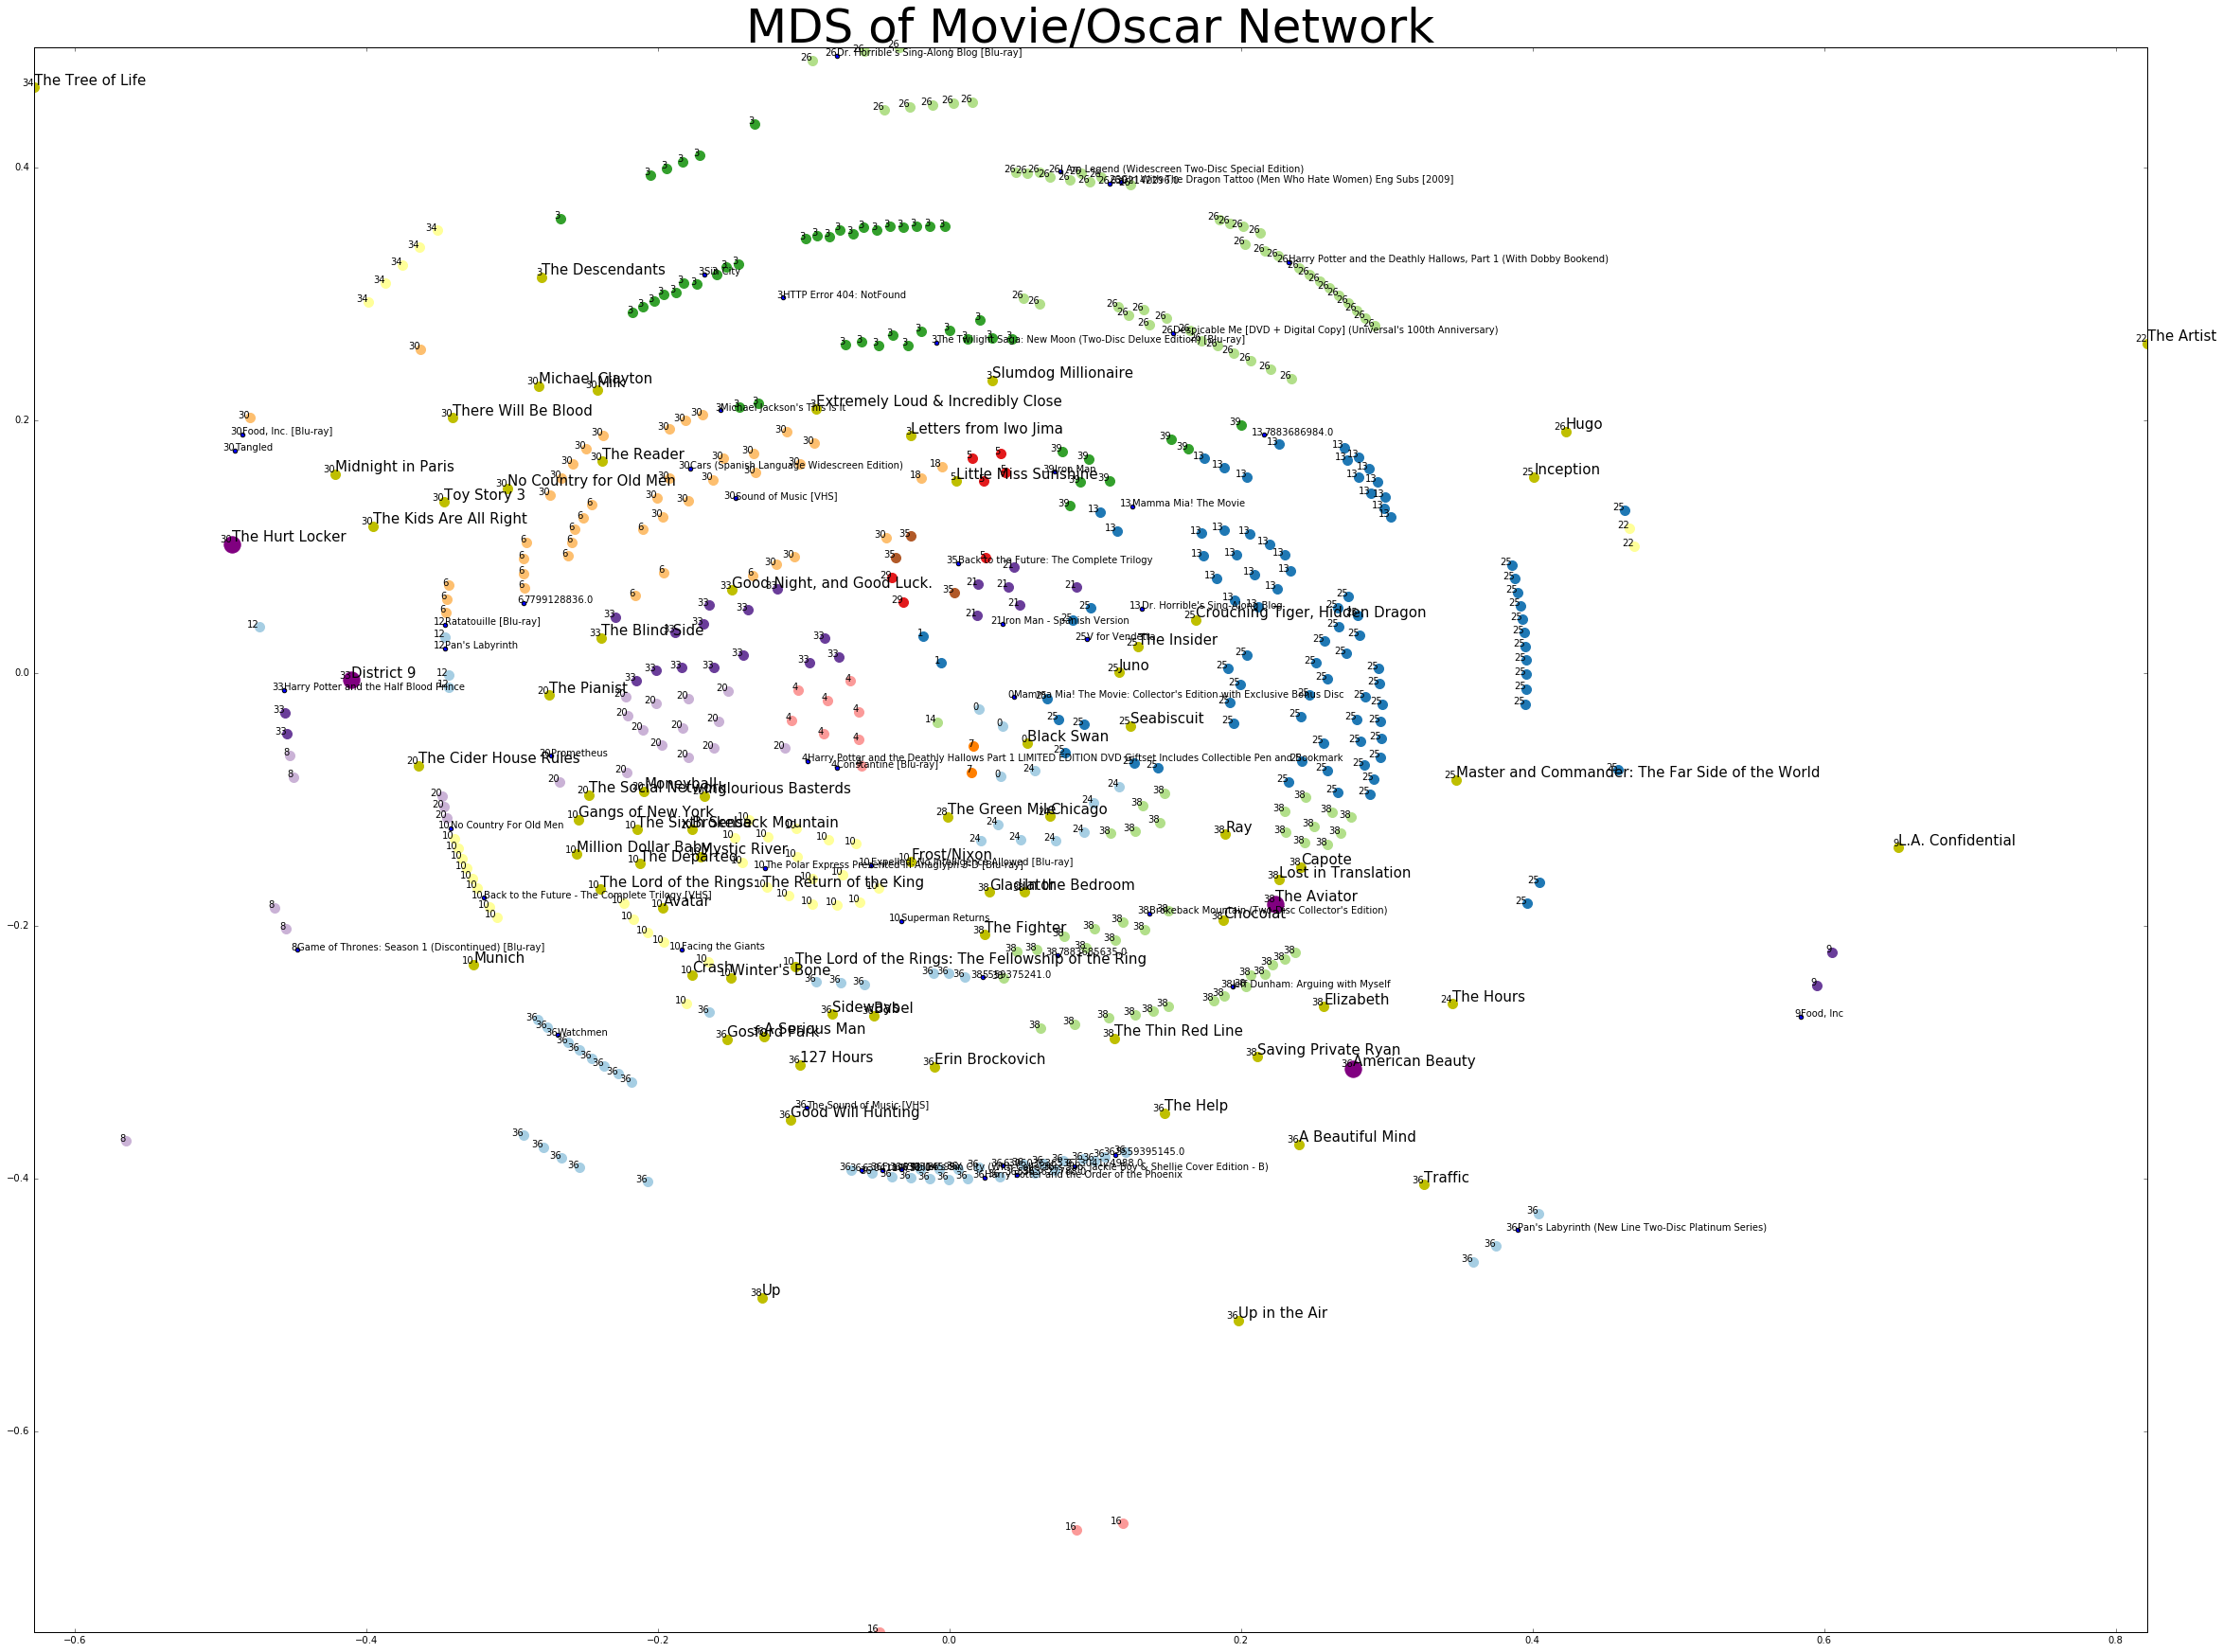

In [130]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 40
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size

colors = ["#a6cee3",
"#1f78b4",
"#b2df8a",
"#33a02c",
"#fb9a99",
"#e31a1c",
"#fdbf6f",
"#ff7f00",
"#cab2d6",
"#6a3d9a",
"#ffff99",
"#b15928"]

Titles_Bool = dist_mov_df.index.str.contains("B0")



colors = colors + colors + colors + colors
plt.scatter(x,y)

for i in range(0,len(dist_mov_df.index)):
    if dist_mov_df.index[i] in oscar_nodes:
        if dist_mov_df.index[i] in ["The Aviator", "American Beauty", "District 9", "The Hurt Locker"]:
            plt.scatter(x[i],y[i], color = "#800080", s = 300)
        
        elif dist_mov_df.index[i] in ["B0006Z2KIY", "B0016RDEH2", "Harry Potter and the Deathly Hallows Part 1 LIMITED EDITION DVD Giftset Includes Collectible Pen and Bookmark", "B0024NSG52", "B004G6009K"]:
            plt.scatter(x[i],y[i], color = "#43C6DB", s = 300)

        else:
            plt.scatter(x[i],y[i], color = "y", s = 100)

        plt.text(x[i],y[i],dist_mov_df.index[i], fontsize=15,ha = "left",va = "bottom")
        plt.text(x[i],y[i],labels[i], fontsize=10,ha = "right",va = "bottom")


        
    else:
        if Titles_Bool[i] == False:
            plt.text(x[i],y[i],dist_mov_df.index[i],ha = "left")
            plt.text(x[i],y[i],labels[i],ha = "right")

        else:
            plt.text(x[i],y[i],labels[i],ha = "right")
#         if dist_mov_df.index[i] in ["B0006Z2KIY", "B0016RDEH2", "Harry Potter and the Deathly Hallows Part 1 LIMITED EDITION DVD Giftset Includes Collectible Pen and Bookmark", "B0024NSG52", "B004G6009K"]:
#             plt.scatter(x[i],y[i], color = "#43C6DB", s = 300)
#         else:
            plt.scatter(x[i],y[i], color = colors[labels[i]], s = 100)




plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.title("MDS of Movie/Oscar Network", fontsize = 50)

plt.savefig("MDS_FINAL.png")

In [108]:
user = "A1J2931UBBJPXM"

In [114]:
import operator

maxi = 0
neigh_list_user = []
for i in graph.nodes():
    if graph.node[i]["desc"] == "user":
        neigh_list_user.append((i,nx.degree(graph,i)))
user_views = pd.DataFrame(neigh_list_user)

output2 = nx.shortest_path_length(graph,user,weight = "weight")
movies_seen = graph.neighbors(user)
for i in movies_seen + list(user_views.ix[:,0]):
    output2.pop(i, 0)

sorted_x = sorted(output2.items(), key=operator.itemgetter(1))



In [115]:
sorted_x

[('B0006Z2KIY', 0.6062144816180483),
 ('B000683VI4', 0.6062144816180483),
 ('B001675YZ2', 0.6062144816180483),
 ('B000YMFCS4', 0.6062144816180483),
 ('B009LFVV6M', 0.6062144816180483),
 ('B001C71IFG', 0.6062144816180483),
 ('B003B1X80Y', 0.6062144816180483),
 ('B001HZK8FY', 0.6062144816180483),
 ('B001HZK8FO', 0.6062144816180483),
 ('B004C2L6LY', 0.6062144816180483),
 ('B0036JQ7S6', 0.6062144816180483),
 ('B00068S41I', 0.6062144816180483),
 ('B00068S41S', 0.6062144816180483),
 ('B0016RDEH2', 0.6062151967201),
 ('Harry Potter and the Deathly Hallows Part 1 LIMITED EDITION DVD Giftset Includes Collectible Pen and Bookmark',
  0.606215966578292),
 ('B000UYBP0K', 0.606215966578292),
 ('B001K2KM8M', 0.606215966578292),
 ('B000O76ZQC', 0.606215966578292),
 ('B000WSLCAC', 0.606215966578292),
 ('B004AFQZFA', 0.606215966578292),
 ('B000QVFMUQ', 0.606215966578292),
 ('B002VWOMT0', 0.606215966578292),
 ('B003Y1D7UC', 0.606215966578292),
 ('B003XC1OP2', 0.606215966578292),
 ('Constantine [Blu-ray]

[('B0006Z2KIY', 0.6062144816180483) The Notebook
 ('B0016RDEH2', 0.6062151967201) Pans Labyrinth
Harry Potter and the Deathly Hallows 0.606215966578292
 Constantine 0.60621622450165

In [117]:
 ('L.A. Confidential', 1.02747424543631),
 ('The Tree of Life', 1.0331058358853917),
 ('The Artist', 1.1135896884939231)]
 ('Downton Abbey', 1.009619114605148),


SyntaxError: invalid syntax (<ipython-input-117-acd867c5fb7b>, line 3)

In [ ]:
dist_mov_df.index in ["B0006Z2KIY", "B0016RDEH2", "Harry Potter and the Deathly Hallows Part 1 LIMITED EDITION DVD Giftset Includes Collectible Pen and Bookmark", "B0024NSG52", "B004G6009K"]

In [124]:
"B0024NSG52" in dist_mov_df.index

True